In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

pd.options.mode.chained_assignment = None

In [3]:
# URL page we will scraping
url = "https://www.basketball-reference.com/teams/CLE"
html = urlopen(url)
soup = BeautifulSoup(html)

# use findALL() to get the column headers
soup.findAll('tr', limit=2)

# use getText()to extract the text we need into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]

# exclude the first column as we will not need the ranking order from Basketball Reference for the analysis
headers = headers[1:]
headers

# avoid the first header row
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

df = pd.DataFrame(player_stats, columns = headers)
df["seasons"] = 2021 - np.arange(52)

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols] 

df = df.iloc[::-1]
df.reset_index(drop=True, inplace=True)
df[:5]

,seasons,Lg,Team,W,L,W/L%,Finish,SRS,,,...,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,,,Playoffs,Coaches,Top WS
0,1970,NBA,Cleveland Cavaliers,15,67,.183,4th of 4,-12.04,,,...,-4.5,92.3,-4.9,102.4,5.2,,,,B. Fitch (15-67),W. Wesley (4.1)
1,1971,NBA,Cleveland Cavaliers,23,59,.280,4th of 4,-7.90,,,...,-0.5,94.5,-3.4,101.4,3.5,,,,B. Fitch (23-59),B. Beard (5.9)
2,1972,NBA,Cleveland Cavaliers,32,50,.390,4th of 4,-2.64,,,...,-2.4,94.0,-2.8,96.5,-0.3,,,,B. Fitch (32-50),L. Wilkens (9.5)
3,1973,NBA,Cleveland Cavaliers,29,53,.354,4th of 4,-4.16,,,...,-3.7,96.0,-1.7,100.1,2.4,,,,B. Fitch (29-53),L. Wilkens (6.5)
4,1974,NBA,Cleveland Cavaliers,40,42,.488,3rd of 5,-0.31,,,...,-4.1,97.6,-0.1,98.0,0.3,,,,B. Fitch (40-42),D. Snyder (6.4)


In [13]:
df[33:40]
df[44:48]

,seasons,Lg,Team,W,L,W/L%,Finish,SRS,,,...,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,,,Playoffs,Coaches,Top WS
44,2014,NBA,Cleveland Cavaliers*,53.0,29.0,0.646,1st of 5,4.08,,,...,-1.6,111.099998,5.5,106.300003,0.7,,,Lost Finals,D. Blatt (53-29),K. Irving (10.4)
45,2015,NBA,Cleveland Cavaliers*,57.0,25.0,0.695,1st of 5,5.45,,,...,-2.5,110.900002,4.5,104.500000,-1.9,,,Won Finals,"D. Blatt (30-11), T. Lue (27-14)",L. James (13.6)
46,2016,NBA,Cleveland Cavaliers*,51.0,31.0,0.622,1st of 5,2.87,,,...,-0.2,113.599998,4.8,110.300003,1.5,,,Lost Finals,T. Lue (51-31),L. James (12.9)
47,2017,NBA,Cleveland Cavaliers*,50.0,32.0,0.610,1st of 5,0.59,,,...,0.7,112.900002,4.3,111.900002,3.3,,,Lost Finals,T. Lue (50-32),L. James (14.0)


In [14]:
# converting data into numeric form as it's text by default

numeric_cols = ['W', 'L', 'W/L%', 'SRS', 'Pace', 'Rel Pace', 'ORtg', 'Rel ORtg', 'DRtg', 'Rel DRtg']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], downcast="float")

In [15]:
A = np.array([33, 34, 35, 36, 37, 38, 39, 44, 45, 46, 47])
B = np.arange(52)
B = np.array([i for i in B if i not in A])

In [16]:
with_lbj_idx = A
without_lbj_idx = B
dfa = df.loc[A, :]
dfb = df.loc[B, :]

# LeBron's impact on Win Percentage

In [24]:
from scipy.stats import mannwhitneyu, ttest_ind

stat_name = 'W'

mean_stat_with_lebron = np.mean(dfa[stat_name])
mean_stat_without_lebron = np.mean(dfb[stat_name])
print(mean_stat_with_lebron, mean_stat_without_lebron)

print(mannwhitneyu(dfa[stat_name], dfb[stat_name]))
print(ttest_ind(dfa[stat_name], dfb[stat_name]))

50.909092 32.634148
MannwhitneyuResult(statistic=50.5, pvalue=4.5526603759292294e-05)
Ttest_indResult(statistic=4.668031018216327, pvalue=2.3136280451789237e-05)


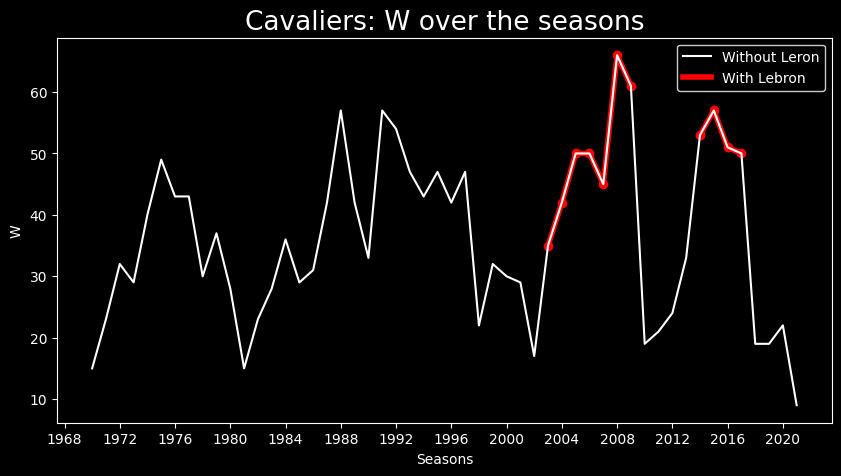

In [25]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [10, 5]
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))
plt.plot(df['seasons'], df[stat_name], color='white')
plt.scatter(df['seasons'][33:40], df[stat_name][33:40], color='#ff0000')
plt.scatter(df['seasons'][44:48], df[stat_name][44:48], color='#ff0000')
plt.plot(df['seasons'][33:40], df[stat_name][33:40], color='#ff0000', lw=4, zorder=-1)
plt.plot(df['seasons'][44:48], df[stat_name][44:48], color='#ff0000', lw=4, zorder=-1)
plt.legend(shadow=True, labels=['Without Leron', 'With Lebron'])
plt.xlabel("Seasons")
plt.ylabel("{}".format(stat_name))
plt.title("Cavaliers: {} over the seasons".format(stat_name), size=19)

# plt.axvspan(1984, 1992, color='white', alpha=0.4)
# plt.axvspan(1995, 1997, color='white', alpha=0.5)

plt.show()